In [1]:
import os  
import pandas #Python Data Analysis Library 
import numpy  #Python Scientific Library (Umumnya membantu dalam urusan list)
import cv2 as opcv

#Selective import modul-modul Scikit Learn 
#(Scikit Learn memiliki banyak modul machine learning)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error   
from matplotlib import pyplot
from skimage.feature import local_binary_pattern

#RUN
import tensorflow as tf                                                          
import keras_preprocessing                                                        
from keras_preprocessing import image                                            
from keras_preprocessing.image import ImageDataGenerator       

In [2]:
#inisialisasi local binary pattern
radius = 3
n_points = 8 * radius
METHOD = 'uniform'
pyplot.rcParams['font.size'] = 9

path = "D:\\Download\\Compressed\\dataset_bola\\dataset_bola\\"

In [3]:
#fungsi untuk preprocessing citra
def praproses(x):
    #aplikasi gaussian blur untukn smoothing citra dengan filter 3x3
    gaussian = opcv.GaussianBlur(x, (3, 3), 0)
    #return hasil citra
    return gaussian

def img_lbp_hos(source):
    # proses ekstrasi ciri menggunakan lbp
    lbp_array = local_binary_pattern(source, n_points, radius, METHOD)

    return lbp_array

In [4]:
dataset = []
response = []

j=0
for folder in os.listdir(path):
    # memnabaca setiap yang ada dalam 
    for filename in os.listdir(path+folder):
        img = opcv.imread(path+folder+"\\"+filename,0)
        
        img = opcv.resize(img,(150,150))
        

        pre_img = praproses(img)
        his_img = img_lbp_hos(pre_img)

        dataset.append(his_img)
        response.append(j)
    j+=1

dataset = numpy.array(dataset).astype(numpy.float32)
response = numpy.array(response).astype(numpy.float32) 

In [5]:
model = tf.keras.models.Sequential([                                                  #Membentuk model sequential
                                                                                      #Bentuk input adalah gambar dengan ukuran 150x150 dengan 3 byte warna
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,1)),  #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                        #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                   #Hiden layer pertama dengan 512 neuron
    
    tf.keras.layers.Dense(512, activation='relu'),                                   #Hiden layer kedua dengan 512 neuron
    
    tf.keras.layers.Dense(3, activation='softmax')                                   #Layer output
])

model.summary()                                                                      #Menampilkan summary model
Model: "sequential_2"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [6]:
train_list, test_list, train_res, test_res = train_test_split(dataset, response, test_size=0.2, random_state=0)

In [7]:
#RUN
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),                                  #Loss function Yang digunakan untuk Klasifikasi Kategori Lebih Dari 2
              optimizer='rmsprop',                                                #Fungsi optimizer(Yang Pernah diajarkan adalah 'adam')
              metrics=['accuracy'])                                               #Menampilkan akurasi model training

In [8]:
history = model.fit(train_list, train_res,epochs=100, validation_data=(test_list, test_res))


Epoch 1/100


c:\Users\V3Te\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 3s 548ms/step - loss: 6.6404 - accuracy: 0.3500 - val_loss: 1.1720 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 2s 439ms/step - loss: 1.2062 - accuracy: 0.3833 - val_loss: 1.0807 - val_accuracy: 0.3667
Epoch 3/100
4/4 [==============================] - 2s 440ms/step - loss: 1.0936 - accuracy: 0.3667 - val_loss: 1.1002 - val_accuracy: 0.3667
Epoch 4/100
4/4 [==============================] - 2s 418ms/step - loss: 1.0725 - accuracy: 0.5167 - val_loss: 1.1292 - val_accuracy: 0.4000
Epoch 5/100
4/4 [==============================] - 2s 429ms/step - loss: 0.9586 - accuracy: 0.5583 - val_loss: 1.6585 - val_accuracy: 0.4333
Epoch 6/100
4/4 [==============================] - 2s 386ms/step - loss: 1.1514 - accuracy: 0.4500 - val_loss: 1.1502 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 2s 445ms/step - loss: 0.9549 - accuracy: 0.5417 - val_loss: 1.0913 - val_accuracy: 0.3667
Epoch 8/100
4/4 [========

In [9]:
cnn_predik = model.predict(test_list)
cnn_predik = cnn_predik.tolist()
cnn_true= []

for i in cnn_predik:
    x = max(i)
    
    cnn_true.append(i.index(x))

cnn_true=numpy.array(cnn_true)
print(cnn_true)

1/1 [==============================] - 0s 153ms/step
[1 1 0 2 2 2 2 1 1 1 2 2 1 0 1 0 1 2 1 2 2 1 2 0 2 2 2 2 0 2]


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

cnn_acc = accuracy_score(test_res, cnn_true)
print(cnn_acc*100)

53.333333333333336


In [11]:

print('------------------------ confusion matrix  ------------------------------')
label=[0,1,2]
label = numpy.array(label)
cf_matrix=confusion_matrix(test_res, cnn_true)
print(cf_matrix)
print('--------------------- classification report  ----------------------------')
print(classification_report(test_res, cnn_true))

------------------------ confusion matrix  ------------------------------
[[3 1 7]
 [2 8 3]
 [0 1 5]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

         0.0       0.60      0.27      0.37        11
         1.0       0.80      0.62      0.70        13
         2.0       0.33      0.83      0.48         6

    accuracy                           0.53        30
   macro avg       0.58      0.57      0.52        30
weighted avg       0.63      0.53      0.53        30



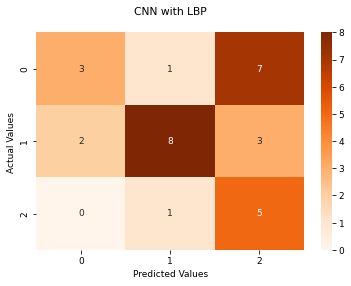

In [14]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Oranges')

ax.set_title('CNN with LBP\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2])
ax.yaxis.set_ticklabels([0,1,2])

## Display the visualization of the Confusion Matrix.
pyplot.show()

In [13]:
test_loss, test_acc = model.evaluate(test_list, test_res)
print(test_acc)

1/1 [==============================] - 0s 78ms/step - loss: 2.0860 - accuracy: 0.5333
0.5333333611488342
